In [9]:
pip install us

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install census

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Dependencies
import requests
import pandas as pd
from census import Census

In [12]:
# Import U.S. Census API Key
from config import api_key
if api_key == "YOUR KEY HERE":
    print("Please edit your config.py file.")

# Create an instance of the Census library
c = Census(api_key)
print("Census API instance created successfully")

Please edit your config.py file.
Census API instance created successfully


In [13]:
from census import Census
from us import states
import pandas as pd
from us import states
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [14]:
# Import U.S. Census API Key
from config import api_key
if api_key == "{api_key}":
    print("Please edit your config.py file.")

# Create an instance of the Census library
c = Census(
    api_key
)

In [15]:
json_list = c.acs5.tables()
json_list

[{'name': 'B17015',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Social Security Income by Supplemental Security Income (SSI) and Cash Public Assistance Income',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17015.json',
  'universe ': 'Families'},
 {'name': 'B18104',
  'description': 'Sex by Age by Cognitive Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18104.json',
  'universe ': 'Civilian noninstitutionalized population 5 years and over'},
 {'name': 'B17016',
  'description': 'Poverty Status in the Past 12 Months of Families by Family Type by Work Experience of Householder and Spouse',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B17016.json',
  'universe ': 'Families'},
 {'name': 'B18105',
  'description': 'Sex by Age by Ambulatory Difficulty',
  'variables': 'http://api.census.gov/data/2022/acs/acs5/groups/B18105.json',
  'universe ': 'Civilian noninstitutionalized populat

In [16]:
data = c.acs5.get(
    (
        'NAME',
        "B25039_002E",
        "B25027_010E",
        "B25027_002E",
        "B25088_002E",
        "B25088_003E",
        "B25099_002E",
        "B25099_003E",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E"
    ),
    {'for': 'state:{}'.format(states.CA.fips)}
)

In [17]:
west_region_states = [
    'MT',
    'WY',
    'CO',
    'ID',
    'UT',
    'NV',
    'WA',
    'OR',
    'CA',
    'AK',
    'HI'
]
data_years = [
    2018,
    2019,
    2020,
    2021,
    2022
]

In [19]:
c.acs5.state(
    (
         'NAME',
        "B25039_002E",
        "B25027_010E",
        "B25027_002E",
        "B25088_002E",
        "B25088_003E",
        "B25099_002E",
        "B25099_003E",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B25077_001E",
    ), states.CA.fips, year=2022)

[{'NAME': 'California',
  'B25039_002E': '2007',
  'B25027_010E': 2340188.0,
  'B25027_002E': 5067173.0,
  'B25088_002E': 2759.0,
  'B25088_003E': 732.0,
  'B25099_002E': 136094.0,
  'B25099_003E': 82851.0,
  'B19013_001E': 91905.0,
  'B01003_001E': 39356104.0,
  'B01002_001E': 37.3,
  'B19301_001E': 45591.0,
  'B17001_002E': 4685272.0,
  'B25077_001E': 659300.0,
  'state': '06'}]

In [22]:
census_data = []
for data_year in data_years:
    for state in west_region_states:
        state_data = c.acs5.get(
            (
                'NAME',
                "B25039_002E",
                "B25027_010E",
                "B25027_002E",
                "B25088_001E",
                "B25088_002E",
                "B25088_003E",
                "B25099_002E",
                "B25099_003E",
                "B19013_001E",
                "B01003_001E",
                "B01002_001E",
                "B19301_001E",
                "B17001_002E",
                "B25077_001E"
            ),
            {'for': 'state:{}'.format(states.lookup(state).fips)},
            year=data_year
        )[0]
        state_data["Year"] = data_year
        census_data.append(state_data)
census_data

[{'NAME': 'Montana',
  'B25039_002E': 2004.0,
  'B25027_010E': 124238.0,
  'B25027_002E': 162315.0,
  'B25088_001E': 881.0,
  'B25088_002E': 1386.0,
  'B25088_003E': 421.0,
  'B25099_002E': 76857.0,
  'B25099_003E': 47809.0,
  'B19013_001E': 52559.0,
  'B01003_001E': 1041732.0,
  'B01002_001E': 39.8,
  'B19301_001E': 29765.0,
  'B17001_002E': 139063.0,
  'B25077_001E': 219600.0,
  'state': '30',
  'Year': 2018},
 {'NAME': 'Wyoming',
  'B25039_002E': 2005.0,
  'B25027_010E': 67108.0,
  'B25027_002E': 93013.0,
  'B25088_001E': 963.0,
  'B25088_002E': 1428.0,
  'B25088_003E': 415.0,
  'B25099_002E': 88916.0,
  'B25099_003E': 53994.0,
  'B19013_001E': 62268.0,
  'B01003_001E': 581836.0,
  'B01002_001E': 37.3,
  'B19301_001E': 32295.0,
  'B17001_002E': 63311.0,
  'B25077_001E': 213300.0,
  'state': '56',
  'Year': 2018},
 {'NAME': 'Colorado',
  'B25039_002E': 2006.0,
  'B25027_010E': 387894.0,
  'B25027_002E': 983251.0,
  'B25088_001E': 1359.0,
  'B25088_002E': 1681.0,
  'B25088_003E': 458.

In [23]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B25039_002E": "Median Year Moved In",
        "B25027_010E": "Total Housing without Mortgage",
        "B25027_002E": "Total Housing with Mortgage",
        "B25088_002E": "Median Monthly Costs with Mortgage",
        "B25088_003E": "Median Monthly Costs without Mortgage", 
        "B25099_002E": "Median Household Income with Mortgage",
        "B25099_003E": "Median Household Income without Mortgage",
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B25077_001E": "Median Home Value",
        "NAME": "State"
    }
)

In [25]:
# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

# Configure the final DataFrame
census_pd = census_pd[
    [
        "State",
        "Year",
        "Population",
        "Median Age",
        "Median Year Moved In",
        "Median Home Value",
        "Total Housing with Mortgage",
        "Total Housing without Mortgage",
        "Median Monthly Costs with Mortgage",
        "Median Monthly Costs without Mortgage",
        "Household Income",
        "Per Capita Income", 
        "Median Household Income with Mortgage",
        "Median Household Income without Mortgage",
        "Poverty Count",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.tail(11)

Number of rows in the DataFrame: 55


,State,Year,Population,Median Age,Median Year Moved In,Median Home Value,Total Housing with Mortgage,Total Housing without Mortgage,Median Monthly Costs with Mortgage,Median Monthly Costs without Mortgage,Household Income,Per Capita Income,Median Household Income with Mortgage,Median Household Income without Mortgage,Poverty Count,Poverty Rate
44,Montana,2022,1091840.0,40.1,2009,305700.0,168923.0,137509.0,1660.0,519.0,66341.0,37837.0,95149.0,60133.0,132329.0,12.119816
45,Wyoming,2022,577929.0,38.5,2010,269900.0,97687.0,70706.0,1642.0,489.0,72495.0,39547.0,102866.0,65959.0,60134.0,10.405084
46,Colorado,2022,5770790.0,37.3,2011,465900.0,1057739.0,449808.0,2109.0,578.0,87598.0,47346.0,121231.0,76863.0,540105.0,9.359290
47,Idaho,2022,1854109.0,36.9,2011,331600.0,309472.0,176807.0,1520.0,449.0,70214.0,34919.0,93096.0,64078.0,198788.0,10.721484
48,Utah,2022,3283809.0,31.4,2011,408500.0,523663.0,227989.0,1830.0,501.0,86833.0,37023.0,113097.0,80347.0,275188.0,8.380146
49,Nevada,2022,3104817.0,38.5,2012,373800.0,454707.0,225253.0,1791.0,491.0,71646.0,37945.0,101618.0,69966.0,389456.0,12.543606
50,Washington,2022,7688549.0,38.0,2010,473400.0,1277064.0,623188.0,2249.0,703.0,90325.0,48685.0,126200.0,78097.0,747538.0,9.722745
51,Oregon,2022,4229374.0,39.9,2010,423100.0,697213.0,365309.0,1984.0,634.0,76632.0,41805.0,111489.0,67650.0,494158.0,11.683951
52,California,2022,39356104.0,37.3,2007,659300.0,5067173.0,2340188.0,2759.0,732.0,91905.0,45591.0,136094.0,82851.0,4685272.0,11.904817
53,Alaska,2022,734821.0,35.3,2009,318000.0,106808.0,68390.0,2130.0,652.0,86370.0,42828.0,120033.0,78358.0,75227.0,10.237459


In [26]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("west_data.csv", encoding="utf-8", index=False)

In [27]:
# Add the columns to get the total number of owned homes
census_pd["Total Owned Homes"] = census_pd["Total Housing with Mortgage"] + census_pd["Total Housing without Mortgage"]

# Calculate the home ownership rate
census_pd["Home Ownership Rate"] = 100 * census_pd["Total Owned Homes"].astype(int) / census_pd["Population"].astype(int)

# Group by year and calculate the mean home ownership rate for each year, and rename it
yearly_ownership_rate = census_pd.groupby("Year")["Home Ownership Rate"].mean()
yearly_ownership_rate.head()

Year
2018    23.156332
2019    23.375444
2020    23.753553
2021    23.983017
2022    24.313154
Name: Home Ownership Rate, dtype: float64

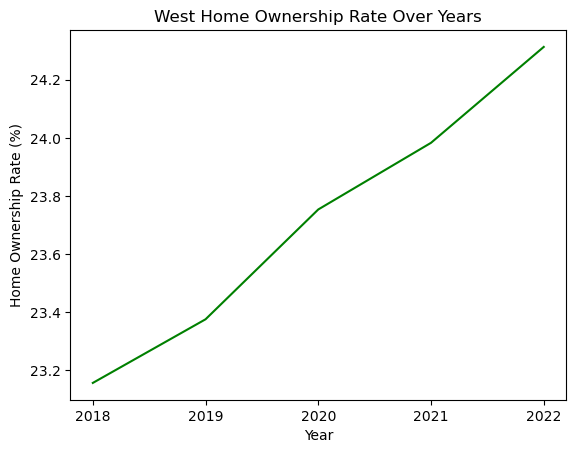

In [33]:
# Plot the home ownership rate over the years
plt.plot(yearly_ownership_rate.index, yearly_ownership_rate.values, linestyle='-', color='g')
plt.title('West Home Ownership Rate Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Home Ownership Rate (%)')
plt.show()

In [29]:
labels = []
medians = []
for data_year in data_years:
    labels.append(str(data_year))
    medians.append(census_pd.loc[census_pd["Year"] == data_year]["Household Income"].median())

medians

[68374.0, 71621.0, 74197.0, 79133.0, 86370.0]

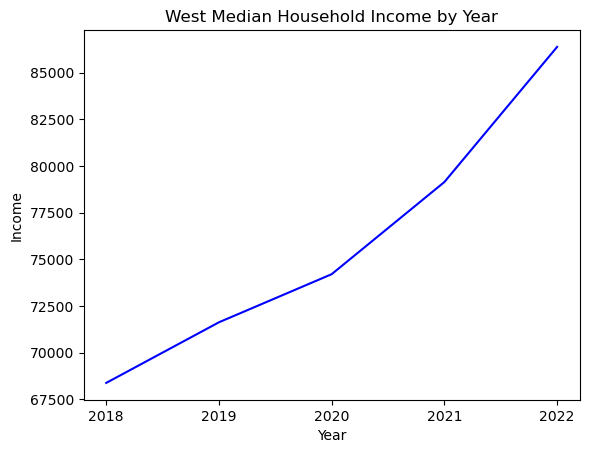

In [34]:
plt.plot(labels, medians, "b-")

# Incorporate the other graph properties
plt.title('West Median Household Income by Year')
plt.xlabel('Year')
plt.ylabel('Income')

# Show plot
plt.show()

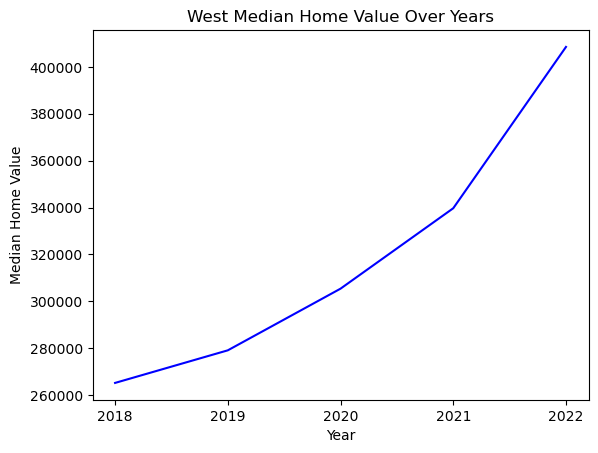

In [35]:
# Filter the data to get median home values over the years
years = census_pd["Year"].unique()
median_home_values = []

for year in years:
    median_value = census_pd.loc[census_pd["Year"] == year]["Median Home Value"].median()
    median_home_values.append(median_value)

# Create the plot
# plt.figure(figsize=(10, 6))
plt.plot(years, median_home_values, linestyle='-', color='b')
plt.title('West Median Home Value Over Years')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Median Home Value')

# Show the plot
plt.show()

In [32]:
census_pd[["Median Home Value", "Median Monthly Costs with Mortgage"]].describe()

,Median Home Value,Median Monthly Costs with Mortgage
count,55.000000,55.000000
mean,357861.818182,1834.254545
std,135841.755009,390.561714
min,192300.000000,1228.000000
25%,265850.000000,1530.000000
50%,313600.000000,1744.000000
75%,403050.000000,2025.000000
max,764800.000000,2778.000000


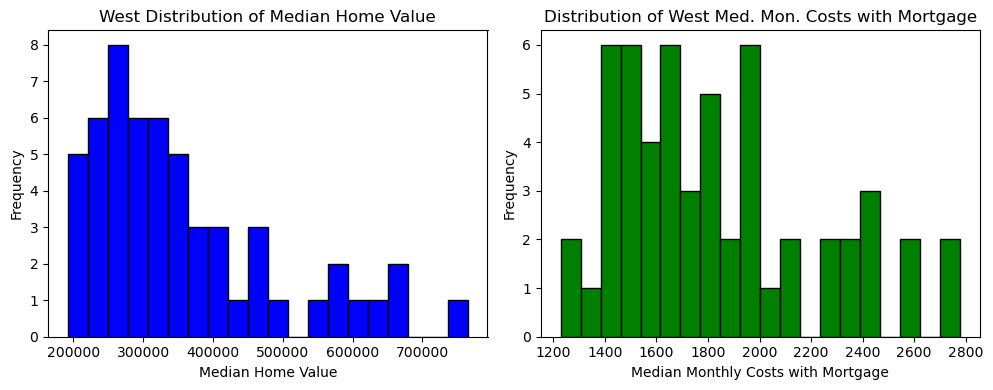

In [36]:
plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(census_pd["Median Home Value"], bins=20, color='blue', edgecolor='black')
plt.title('West Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs with Mortgage
plt.subplot(1, 2, 2)
plt.hist(census_pd["Median Monthly Costs with Mortgage"], bins=20, color='green', edgecolor='black')
plt.title('Distribution of West Med. Mon. Costs with Mortgage')
plt.xlabel('Median Monthly Costs with Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

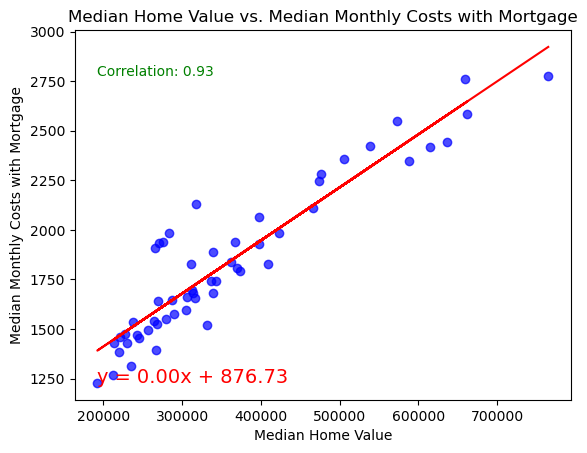

In [37]:
# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_with_mortgage = census_pd["Median Monthly Costs with Mortgage"]

# Calculate Pearson correlation, Perform linear regression calculate regression line.
correlation = st.pearsonr(home_values, costs_with_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_with_mortgage)
regression_line = slope * home_values + intercept

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_with_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Add regression equation 
equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(home_values.min(), costs_with_mortgage.min(), equation_text, fontsize=14, color="red")

# Create the scatter plot
plt.scatter(home_values, costs_with_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs with Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs with Mortgage')

# Show the plot
plt.show()

In [38]:
census_pd[["Median Home Value", "Median Monthly Costs without Mortgage"]].describe()

,Median Home Value,Median Monthly Costs without Mortgage
count,55.000000,55.000000
mean,357861.818182,516.490909
std,135841.755009,88.814804
min,192300.000000,368.000000
25%,265850.000000,436.000000
50%,313600.000000,519.000000
75%,403050.000000,582.500000
max,764800.000000,732.000000


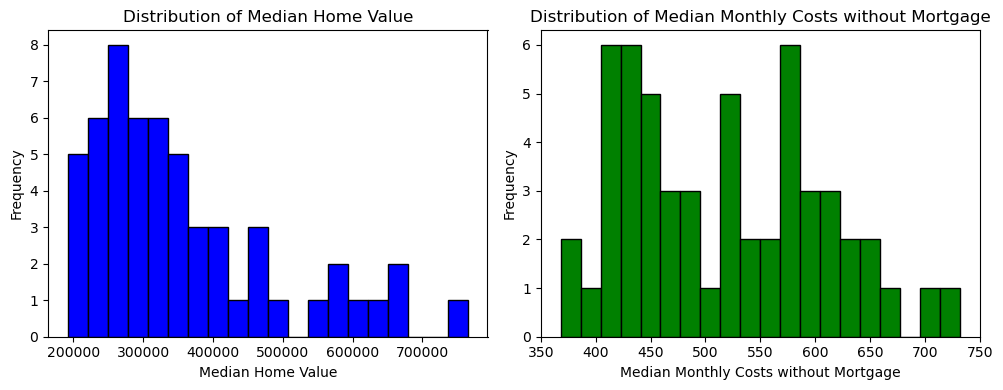

In [39]:
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

plt.figure(figsize=(10, 4))

# Histogram for Median Home Value
plt.subplot(1, 2, 1)
plt.hist(home_values, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')

# Histogram for Median Monthly Costs without Mortgage
plt.subplot(1, 2, 2)
plt.hist(costs_without_mortgage, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Median Monthly Costs without Mortgage')
plt.xlabel('Median Monthly Costs without Mortgage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
def regressValues(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    return regress_values

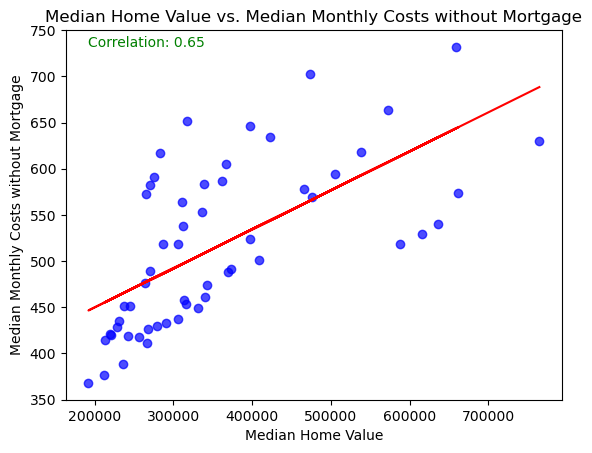

In [41]:
# Extract the relevant columns for the scatter plot
home_values = census_pd["Median Home Value"]
costs_without_mortgage = census_pd["Median Monthly Costs without Mortgage"]

correlation = st.pearsonr(home_values, costs_without_mortgage)
slope, intercept, r_value, p_value, std_err = st.linregress(home_values, costs_without_mortgage)
regression_line = slope * home_values + intercept

# Apply the regression line
plt.plot(home_values, regression_line, "r-", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.text(min(home_values), max(costs_without_mortgage), f'Correlation: {correlation[0]:.2f}', color='green')

# Create the scatter plot
plt.scatter(home_values, costs_without_mortgage, alpha=0.7, color='b')
plt.title('Median Home Value vs. Median Monthly Costs without Mortgage')
plt.xlabel('Median Home Value')
plt.ylabel('Median Monthly Costs without Mortgage')

# Show the plot
plt.show()

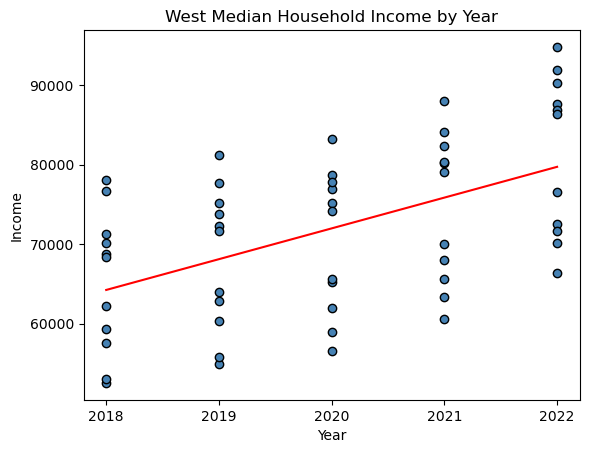

In [42]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Household Income"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Household Income"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('West Median Household Income by Year')
plt.xlabel('Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.ylabel('Income')

# Show plot
plt.show()

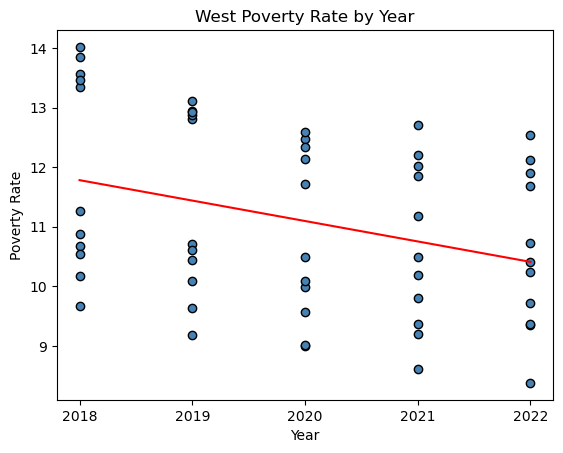

In [43]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('West Poverty Rate by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()

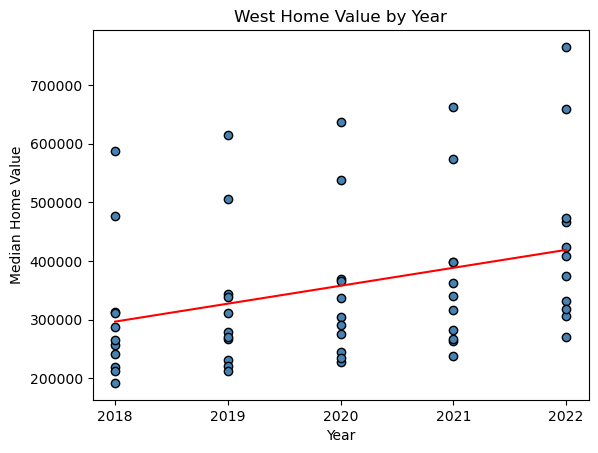

In [44]:
plt.plot(census_pd["Year"], regressValues(census_pd["Year"], census_pd["Median Home Value"]),"r-")
plt.scatter(census_pd["Year"], census_pd["Median Home Value"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('West Home Value by Year')
plt.xticks(ticks=[2018, 2019, 2020, 2021, 2022])
plt.xlabel('Year')
plt.ylabel('Median Home Value')

# Show plot
plt.show()

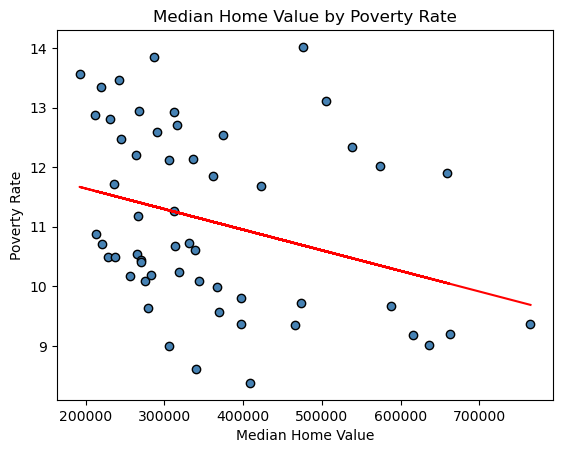

In [45]:
plt.plot(census_pd["Median Home Value"], regressValues(census_pd["Median Home Value"], census_pd["Poverty Rate"]),"r-")
plt.scatter(census_pd["Median Home Value"], census_pd["Poverty Rate"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('Median Home Value by Poverty Rate')
plt.xlabel('Median Home Value')
plt.ylabel('Poverty Rate')

# Show plot
plt.show()